This notebook demonstrates how to calculate a quantum kernel using squlearn kernel module. It generates data, creates a Quantum Embedding Kernel (QEK) feature map with two layers and one feature, and initializes its parameters with random values. It then creates a Qiskit Fidelity Kernel with a quantum instance and a Backend Sampler, assigns the parameters to the random values, and uses an SVR model to fit the kernel to the data. Finally, the predicted values are plotted against the actual values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.primitives import BackendSampler

from squlearn.feature_map import QEKFeatureMap
from squlearn.kernel.matrix import FidelityKernel
from squlearn.kernel.ml import QKRR 
from squlearn.util import Executor

C:\Users\jsl\AppData\Roaming\Python\Python310\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: skit-terra is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\jsl\AppData\Roaming\Python\Python310\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: skit-aer is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
x = np.linspace(-0.8,0.8,20)
x_fine = np.linspace(-0.9,0.9,200)
y = np.sin(10.0*x)*np.cos(np.exp(2*x))

In [3]:
num_qubits = 10
fmap = QEKFeatureMap(num_qubits,num_features=1,num_layers=2)

In [4]:
np.random.seed(10)
parameters = np.random.rand(fmap.num_parameters)

Demonstrating functionality of QKRR

In [5]:
QI = QuantumInstance(Aer.get_backend('qasm_simulator'),shots=1000)
executor = Executor(QI)

kernel = FidelityKernel(fmap, executor=executor)
kernel.assign_parameters(parameters)

qkrr_inst = QKRR(quantum_kernel=kernel, alpha=1e-3, regularize='thresholding')
qkrr_inst.fit(x.reshape(-1,1), y)
y_pred = qkrr_inst.predict(x_fine.reshape(-1,1))

C:\Users\jsl\AppData\Local\Temp\ipykernel_29892\1305363817.py:1: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  QI = QuantumInstance(Aer.get_backend('qasm_simulator'),shots=1000)


Demonstrating 'mit_depol_noise' feature of FidelityKernel

In [6]:
kernel_mit = FidelityKernel(fmap, executor=executor, mit_depol_noise='msplit')
kernel_mit.assign_parameters(parameters)
kernel_mit.evaluate(x.reshape(-1,1))

array([[ 1.00000000e+00,  8.98694494e-01,  7.12485606e-01,
         4.36924940e-01,  2.28809578e-01,  8.62753958e-02,
         1.58832127e-02,  8.78707390e-03, -1.49822598e-03,
         2.64569282e-04,  3.63500008e-04,  4.57597144e-06,
        -2.16384754e-04, -2.45754407e-04,  5.96002067e-04,
        -2.77991052e-04, -1.44029639e-04,  1.75663491e-04,
         8.03429853e-06, -5.26585030e-05],
       [ 8.98694494e-01,  1.00000000e+00,  9.17220743e-01,
         6.94278990e-01,  4.06435824e-01,  2.06081858e-01,
         7.06530248e-02,  1.12965245e-02,  4.71730582e-03,
        -1.28936937e-03, -6.45979518e-04,  5.24435014e-04,
         2.20484159e-04,  1.16594445e-04, -6.95334024e-04,
         4.68438906e-04,  1.32577395e-04, -2.45104469e-04,
         1.60250806e-05,  7.51909559e-05],
       [ 7.12485606e-01,  9.17220743e-01,  1.00000000e+00,
         9.04367281e-01,  6.56641270e-01,  3.75494325e-01,
         1.63626980e-01,  4.80297287e-02,  4.18634904e-03,
         1.21039236e-03,  3.8

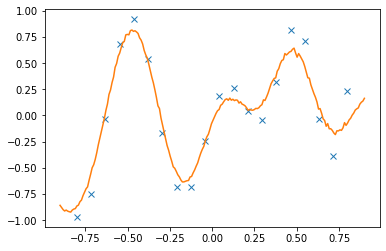

In [5]:
backend = Aer.get_backend('qasm_simulator')
QI = QuantumInstance(backend,shots=5000)

kernel = FidelityKernel(fmap,quantum_instance=QI)
kernel.assign_parameters(parameters)

svr = SVR(kernel=kernel.evaluate)
svr.fit(x.reshape(-1,1),y)

y_fine = svr.predict(x_fine.reshape(-1,1))
plt.plot(x,y,'x')
plt.plot(x_fine,y_fine)

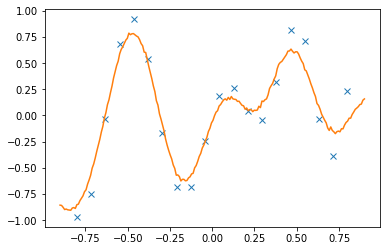

In [6]:
backend = Aer.get_backend('qasm_simulator')
primitive = BackendSampler(backend,options={'shots':5000})

kernel = FidelityKernel(fmap,primitive=primitive)
kernel.assign_parameters(parameters)

svr = SVR(kernel=kernel.evaluate)
svr.fit(x.reshape(-1,1),y)

y_fine = svr.predict(x_fine.reshape(-1,1))
plt.plot(x,y,'x')
plt.plot(x_fine,y_fine)